In [25]:
# Import necessary libraries
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the dataset
data = pd.read_csv(r'C:\Users\Cynth\Desktop\NUS\DBA5101Economics\group project\2DID\GP2Data.csv')

In [4]:
# Remove rows with missing values (NaN)
cleaned_data = data.dropna()

# Check the cleaned data for any remaining issues
print(cleaned_data.info())

# Optionally, you can view a few rows of the cleaned data
print(cleaned_data.head())


<class 'pandas.core.frame.DataFrame'>
Index: 83 entries, 2 to 254
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Area                83 non-null     object 
 1   Date                83 non-null     object 
 2   PaperContaminant    83 non-null     float64
 3   PlasticContaminant  83 non-null     float64
 4   CanContaminant      83 non-null     float64
 5   FirstTrialPhase     83 non-null     float64
dtypes: float64(4), object(2)
memory usage: 4.5+ KB
None
      Area       Date  PaperContaminant  PlasticContaminant  CanContaminant  \
2   ENGINE  2020/1/15          0.714286           35.340136        0.869565   
5   ENGINE  2020/1/16          1.142857           43.925365       17.170330   
8   ENGINE  2020/1/17          1.285714           50.483325       29.047619   
11  ENGINE  2020/1/18          1.714286           47.214206       12.222222   
14  ENGINE  2020/1/19          0.285714           44.44444

In [14]:

# ============== Create necessary variables for DID analysis ==============
# Create dummy variables for post1 and post2 based on FirstTrialPhase
cleaned_data['post1'] = cleaned_data['FirstTrialPhase'].apply(lambda x: 1 if x == 2 else 0)
cleaned_data['post2'] = cleaned_data['FirstTrialPhase'].apply(lambda x: 1 if x == 3 else 0)

# Create a dummy variable for the treatment group (UTOWN = 1, ENGINE = 0)
cleaned_data['treated'] = cleaned_data['Area'].apply(lambda x: 1 if x == 'UTOWN' else 0)

# Create interaction terms: treated * post1 and treated * post2
cleaned_data['treated_post1'] = cleaned_data['treated'] * cleaned_data['post1']
cleaned_data['treated_post2'] = cleaned_data['treated'] * cleaned_data['post2']



cleaned_data shape (83, 11)
      Area       Date  PaperContaminant  PlasticContaminant  CanContaminant  \
2   ENGINE  2020/1/15          0.714286           35.340136        0.869565   
5   ENGINE  2020/1/16          1.142857           43.925365       17.170330   
8   ENGINE  2020/1/17          1.285714           50.483325       29.047619   
11  ENGINE  2020/1/18          1.714286           47.214206       12.222222   
14  ENGINE  2020/1/19          0.285714           44.444444        0.000000   

    FirstTrialPhase  post1  post2  treated  treated_post1  treated_post2  
2               1.0      0      0        0              0              0  
5               1.0      0      0        0              0              0  
8               1.0      0      0        0              0              0  
11              1.0      0      0        0              0              0  
14              1.0      0      0        0              0              0  


C:\Users\Cynth\AppData\Local\Temp\ipykernel_14884\777161075.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['post1'] = cleaned_data['FirstTrialPhase'].apply(lambda x: 1 if x == 2 else 0)
C:\Users\Cynth\AppData\Local\Temp\ipykernel_14884\777161075.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['post2'] = cleaned_data['FirstTrialPhase'].apply(lambda x: 1 if x == 3 else 0)
C:\Users\Cynth\AppData\Local\Temp\ipykernel_14884\777161075.py:7: SettingWithCopyWarning: 
A value is tr

In [19]:
print('cleaned_data shape', cleaned_data.shape)
print(cleaned_data.head())

cleaned_data shape (83, 11)
      Area       Date  PaperContaminant  PlasticContaminant  CanContaminant  \
2   ENGINE  2020/1/15          0.714286           35.340136        0.869565   
5   ENGINE  2020/1/16          1.142857           43.925365       17.170330   
8   ENGINE  2020/1/17          1.285714           50.483325       29.047619   
11  ENGINE  2020/1/18          1.714286           47.214206       12.222222   
14  ENGINE  2020/1/19          0.285714           44.444444        0.000000   

    FirstTrialPhase  post1  post2  treated  treated_post1  treated_post2  
2               1.0      0      0        0              0              0  
5               1.0      0      0        0              0              0  
8               1.0      0      0        0              0              0  
11              1.0      0      0        0              0              0  
14              1.0      0      0        0              0              0  


In [26]:
# ============== Parallel Trend Analysis (Pre-phase) ==============
# Use only the 'pre' phase data to ensure the trends were parallel before intervention
pre_data = cleaned_data[cleaned_data['FirstTrialPhase'] == 1]

# Check the shape and first few rows of pre_data to ensure it is not empty
print("Pre-phase data shape:", pre_data.shape)
print(pre_data.head())

parallel_trend_model = smf.ols('PaperContaminant ~ treated', data=pre_data).fit()
# Output the result of the parallel trend test
print("Parallel Trend Test Results for Paper Contaminant:\n", parallel_trend_model.summary())

Pre-phase data shape: (38, 11)
      Area       Date  PaperContaminant  PlasticContaminant  CanContaminant  \
2   ENGINE  2020/1/15          0.714286           35.340136        0.869565   
5   ENGINE  2020/1/16          1.142857           43.925365       17.170330   
8   ENGINE  2020/1/17          1.285714           50.483325       29.047619   
11  ENGINE  2020/1/18          1.714286           47.214206       12.222222   
14  ENGINE  2020/1/19          0.285714           44.444444        0.000000   

    FirstTrialPhase  post1  post2  treated  treated_post1  treated_post2  
2               1.0      0      0        0              0              0  
5               1.0      0      0        0              0              0  
8               1.0      0      0        0              0              0  
11              1.0      0      0        0              0              0  
14              1.0      0      0        0              0              0  
Parallel Trend Test Results for Paper Contam

In [33]:
parallel_trend_model = smf.ols('PlasticContaminant ~ treated', data=pre_data).fit()
# Output the result of the parallel trend test
print("Parallel Trend Test Results for Plastic Contaminant:\n", parallel_trend_model.summary())

Parallel Trend Test Results for Plastic Contaminant:
                             OLS Regression Results                            
Dep. Variable:     PlasticContaminant   R-squared:                       0.289
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     14.60
Date:                Tue, 15 Oct 2024   Prob (F-statistic):           0.000506
Time:                        16:30:24   Log-Likelihood:                -138.98
No. Observations:                  38   AIC:                             282.0
Df Residuals:                      36   BIC:                             285.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

In [34]:
parallel_trend_model = smf.ols('CanContaminant ~ treated', data=pre_data).fit()
# Output the result of the parallel trend test
print("Parallel Trend Test Results for Can Contaminant:\n", parallel_trend_model.summary())

Parallel Trend Test Results for Can Contaminant:
                             OLS Regression Results                            
Dep. Variable:         CanContaminant   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.552
Method:                 Least Squares   F-statistic:                     46.68
Date:                Tue, 15 Oct 2024   Prob (F-statistic):           5.46e-08
Time:                        16:30:44   Log-Likelihood:                -139.45
No. Observations:                  38   AIC:                             282.9
Df Residuals:                      36   BIC:                             286.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
In

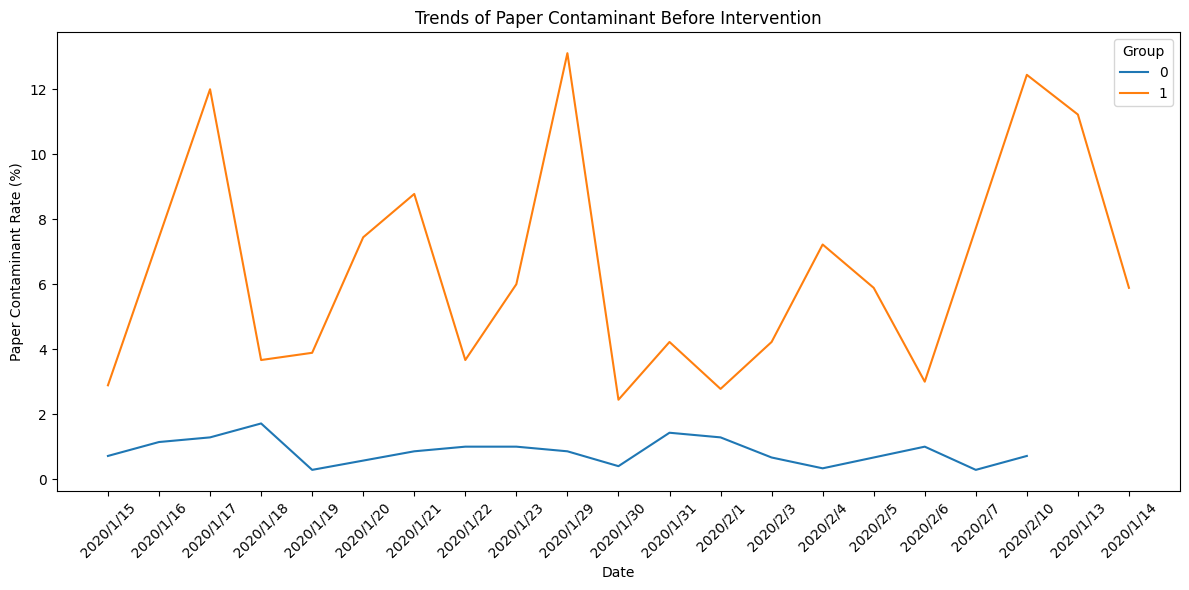

In [30]:
# ============== Visualization of Pre-Trends ==============
# Create a plot to visualize trends for PaperContaminant
plt.figure(figsize=(12, 6))
sns.lineplot(data=cleaned_data[cleaned_data['FirstTrialPhase'] == 1], 
             x='Date', 
             y='PaperContaminant', 
             hue='treated', 
             estimator='mean')
plt.title('Trends of Paper Contaminant Before Intervention')
plt.xlabel('Date')
plt.ylabel('Paper Contaminant Rate (%)')
plt.xticks(rotation=45)
plt.legend(title='Group')
plt.tight_layout()
plt.show()


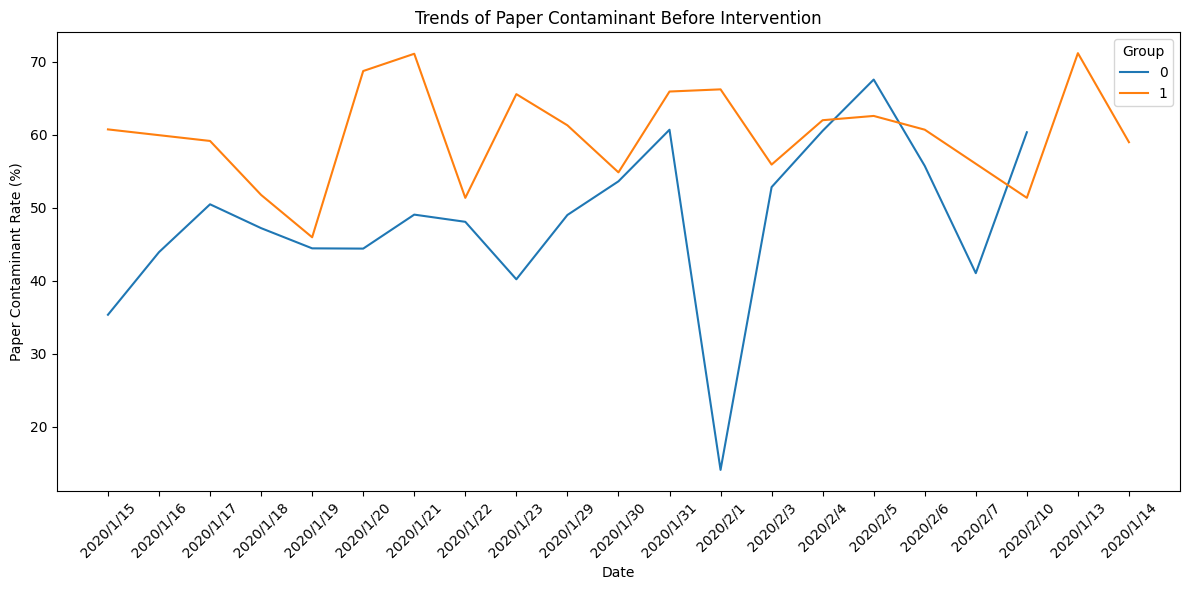

In [31]:
# Create a plot to visualize trends for PlasticContaminant
plt.figure(figsize=(12, 6))
sns.lineplot(data=cleaned_data[cleaned_data['FirstTrialPhase'] == 1], 
             x='Date', 
             y='PlasticContaminant', 
             hue='treated', 
             estimator='mean')
plt.title('Trends of Plastic Contaminant Before Intervention')
plt.xlabel('Date')
plt.ylabel('Plastic Contaminant Rate (%)')
plt.xticks(rotation=45)
plt.legend(title='Group')
plt.tight_layout()
plt.show()

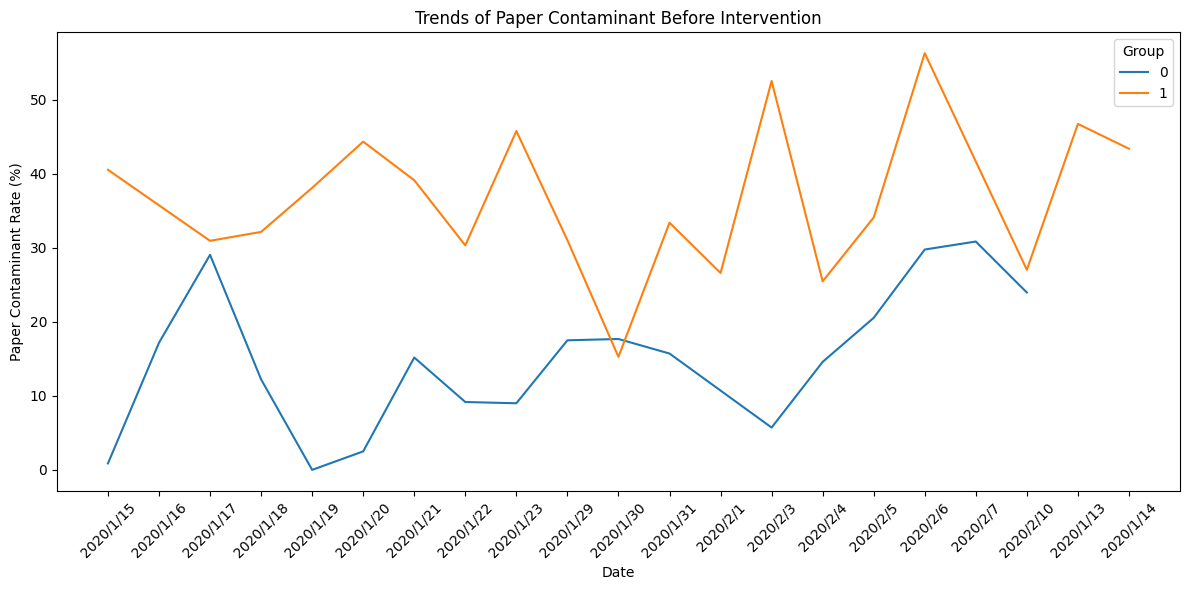

In [32]:
# Create a plot to visualize trends for CanContaminant
plt.figure(figsize=(12, 6))
sns.lineplot(data=cleaned_data[cleaned_data['FirstTrialPhase'] == 1], 
             x='Date', 
             y='CanContaminant', 
             hue='treated', 
             estimator='mean')
plt.title('Trends of Can Contaminant Before Intervention')
plt.xlabel('Date')
plt.ylabel('Can Contaminant Rate (%)')
plt.xticks(rotation=45)
plt.legend(title='Group')
plt.tight_layout()
plt.show()

In [37]:
# ============== Difference-in-Differences Regression (Phase1 and Phase2) ==============
# DID analysis for Paper Contaminant across Phase1 and Phase2
model_paper = smf.ols('PaperContaminant ~ treated + post1 + post2 + treated_post1 + treated_post2', data=cleaned_data).fit()
print("Paper Contaminant Regression Results:\n", model_paper.summary())


Paper Contaminant Regression Results:
                             OLS Regression Results                            
Dep. Variable:       PaperContaminant   R-squared:                       0.558
Model:                            OLS   Adj. R-squared:                  0.529
Method:                 Least Squares   F-statistic:                     19.45
Date:                Tue, 15 Oct 2024   Prob (F-statistic):           1.80e-12
Time:                        16:31:52   Log-Likelihood:                -176.94
No. Observations:                  83   AIC:                             365.9
Df Residuals:                      77   BIC:                             380.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Interce

In [39]:

# DID analysis for Plastic Contaminant
model_plastic = smf.ols('PlasticContaminant ~ treated + post1 + post2 + treated_post1 + treated_post2', data=cleaned_data).fit()
print("Plastic Contaminant Regression Results:\n", model_plastic.summary())

Plastic Contaminant Regression Results:
                             OLS Regression Results                            
Dep. Variable:     PlasticContaminant   R-squared:                       0.525
Model:                            OLS   Adj. R-squared:                  0.494
Method:                 Least Squares   F-statistic:                     17.03
Date:                Tue, 15 Oct 2024   Prob (F-statistic):           2.63e-11
Time:                        16:32:36   Log-Likelihood:                -293.14
No. Observations:                  83   AIC:                             598.3
Df Residuals:                      77   BIC:                             612.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Inter

In [41]:
# DID analysis for Can Contaminant
model_can = smf.ols('CanContaminant ~ treated + post1 + post2 + treated_post1 + treated_post2', data=cleaned_data).fit()
print("Can Contaminant Regression Results:\n", model_can.summary())

Can Contaminant Regression Results:
                             OLS Regression Results                            
Dep. Variable:         CanContaminant   R-squared:                       0.568
Model:                            OLS   Adj. R-squared:                  0.540
Method:                 Least Squares   F-statistic:                     20.28
Date:                Tue, 15 Oct 2024   Prob (F-statistic):           7.39e-13
Time:                        16:32:52   Log-Likelihood:                -297.79
No. Observations:                  83   AIC:                             607.6
Df Residuals:                      77   BIC:                             622.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept